In [2]:
import tensorflow as tf; print(tf.__version__)

2.11.0


In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

from tensorflow.keras.models import Sequential
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3 

In [3]:
train_datagen = ImageDataGenerator (
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 20,
    zoom_range=0.15,
    fill_mode = 'reflect'
    
)

train_generator = train_datagen.flow_from_directory(
    'dataset_classified/train',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
#     save_to_dir = "Augmented_Images" 
    
    
# this will save it into a already created folder named 'Augmented_Images'
    

)

Found 1049 images belonging to 5 classes.


In [4]:
train_generator.class_indices

{'Aloevera': 0, 'Dhaniya patti': 1, 'Money Plant': 2, 'Neem': 3, 'Pudina': 4}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Aloevera', 'Dhaniya patti', 'Money Plant', 'Neem', 'Pudina']

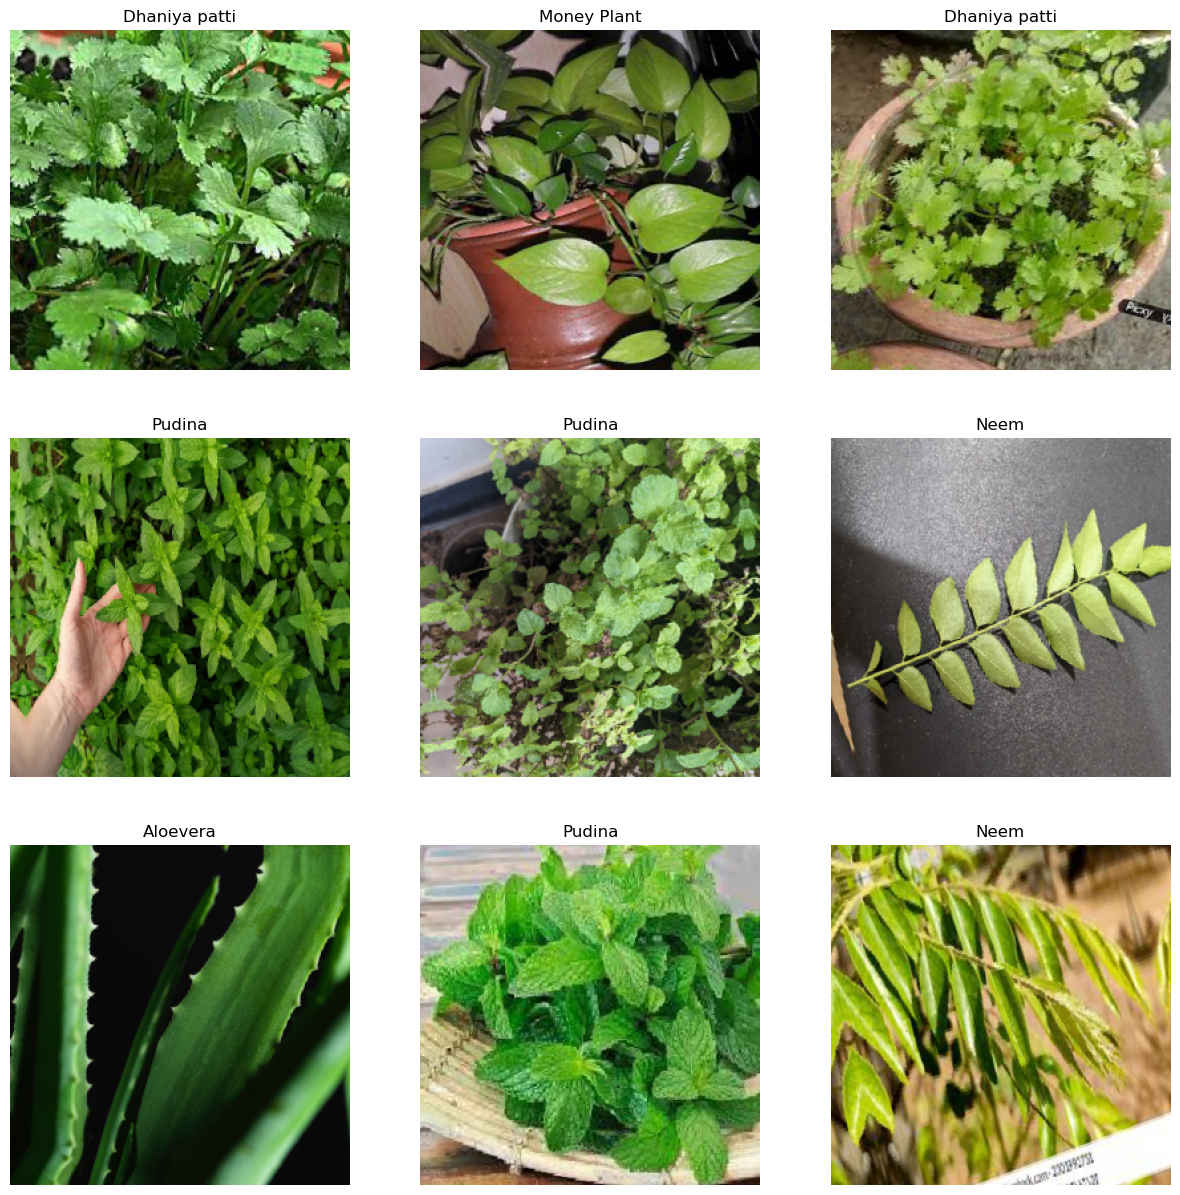

In [6]:
plt.figure(figsize=(15, 15))
for images, labels in train_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
#         predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"{actual_class}")
        
        plt.axis("off")
        
    break 

In [7]:
# for image_batch, label_batch in train_generator:
#     print(image_batch.shape)
#     break


# this will save it into a already created folder named 'Augmented_Images'

In [8]:
validation_datagen = ImageDataGenerator (
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 20,
    zoom_range=0.15,
    fill_mode = 'reflect'
 
)

validation_generator = train_datagen.flow_from_directory(
    'dataset_classified/val',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse')

Found 150 images belonging to 5 classes.


In [9]:
test_datagen = ImageDataGenerator (
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10,
    zoom_range=0.1,
    fill_mode = 'reflect'
)

test_generator = train_datagen.flow_from_directory(
    'dataset_classified/test',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse')

Found 301 images belonging to 5 classes.


In [10]:
CHANNELS = 3
EPOCHS = 100

In [11]:

input_shape = ( IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,  kernel_size = (3,3), padding ='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32,  kernel_size = (3,3), padding= 'same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
print('steps_per_epochs -> train/32 = ',1049/32)
print('validation_steps -> val/32 = ',150/32)

steps_per_epochs -> train/32 =  32.78125
validation_steps -> val/32 =  4.6875


In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch =  32,
    batch_size = 32,
    validation_data = validation_generator,
    validation_steps = 4,
    verbose = 1,
    epochs = EPOCHS,
)

Epoch 1/100
32/32 [==============================] - 47s 1s/step - loss: 1.5985 - accuracy: 0.2158 - val_loss: 1.5465 - val_accuracy: 0.3047
Epoch 2/100
32/32 [==============================] - 45s 1s/step - loss: 1.4940 - accuracy: 0.3252 - val_loss: 1.3720 - val_accuracy: 0.3906
Epoch 3/100
32/32 [==============================] - 45s 1s/step - loss: 1.4649 - accuracy: 0.3451 - val_loss: 1.6137 - val_accuracy: 0.2500
Epoch 4/100
32/32 [==============================] - 45s 1s/step - loss: 1.4468 - accuracy: 0.3717 - val_loss: 1.3396 - val_accuracy: 0.3828
Epoch 5/100
32/32 [==============================] - 45s 1s/step - loss: 1.4221 - accuracy: 0.3677 - val_loss: 1.3662 - val_accuracy: 0.4609
Epoch 6/100
32/32 [==============================] - 50s 2s/step - loss: 1.3761 - accuracy: 0.4100 - val_loss: 1.2776 - val_accuracy: 0.4141
Epoch 7/100
32/32 [==============================] - 53s 2s/step - loss: 1.3322 - accuracy: 0.4248 - val_loss: 1.3143 - val_accuracy: 0.4766
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 45s 1s/step - loss: 0.1413 - accuracy: 0.9459 - val_loss: 0.6379 - val_accuracy: 0.7656
Epoch 60/100
32/32 [==============================] - 48s 1s/step - loss: 0.1105 - accuracy: 0.9597 - val_loss: 0.7967 - val_accuracy: 0.7891
Epoch 61/100
32/32 [==============================] - 65s 2s/step - loss: 0.1305 - accuracy: 0.9518 - val_loss: 0.6048 - val_accuracy: 0.8281
Epoch 62/100
32/32 [==============================] - 53s 2s/step - loss: 0.1294 - accuracy: 0.9597 - val_loss: 0.6985 - val_accuracy: 0.7891
Epoch 63/100
32/32 [==============================] - 48s 2s/step - loss: 0.0756 - accuracy: 0.9725 - val_loss: 0.7420 - val_accuracy: 0.8203
Epoch 64/100
32/32 [==============================] - 48s 2s/step - loss: 0.1740 - accuracy: 0.9390 - val_loss: 1.2133 - val_accuracy: 0.7812
Epoch 65/100
32/32 [==============================] - 50s 2s/step - loss: 0.1953 - accuracy: 0.9361 - val_loss: 0.4657 - val_accuracy: 0.8828
Epoch 

In [16]:
scores = model.evaluate(test_generator)
scores

10/10 [==============================] - 7s 714ms/step - loss: 1.1249 - accuracy: 0.8140


[1.1248652935028076, 0.8139534592628479]

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 32}

In [19]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.5984724760055542,
 1.493954062461853,
 1.4649461507797241,
 1.4467542171478271,
 1.4221056699752808]

In [20]:
history.history['accuracy'][-5:] 

[0.9695181846618652,
 0.9567354917526245,
 0.9832841753959656,
 0.9921337366104126,
 0.9832841753959656]

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

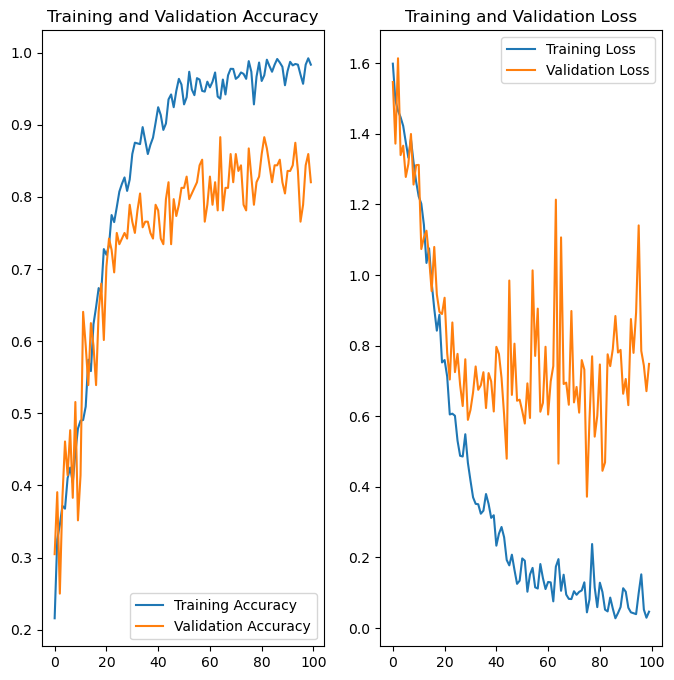

In [22]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Pudina
1/1 [==============================] - 0s 194ms/step
predicted label: Pudina


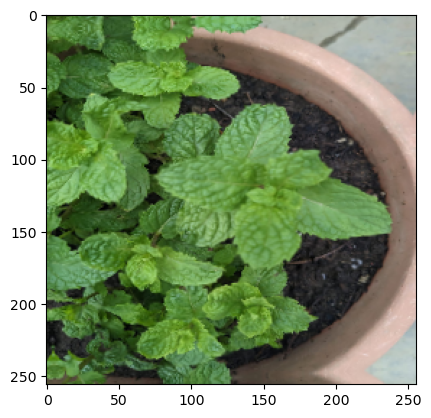

In [29]:
for images_batch, labels_batch in test_generator:
    
    first_image = images_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [30]:
i

8

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 27ms/step


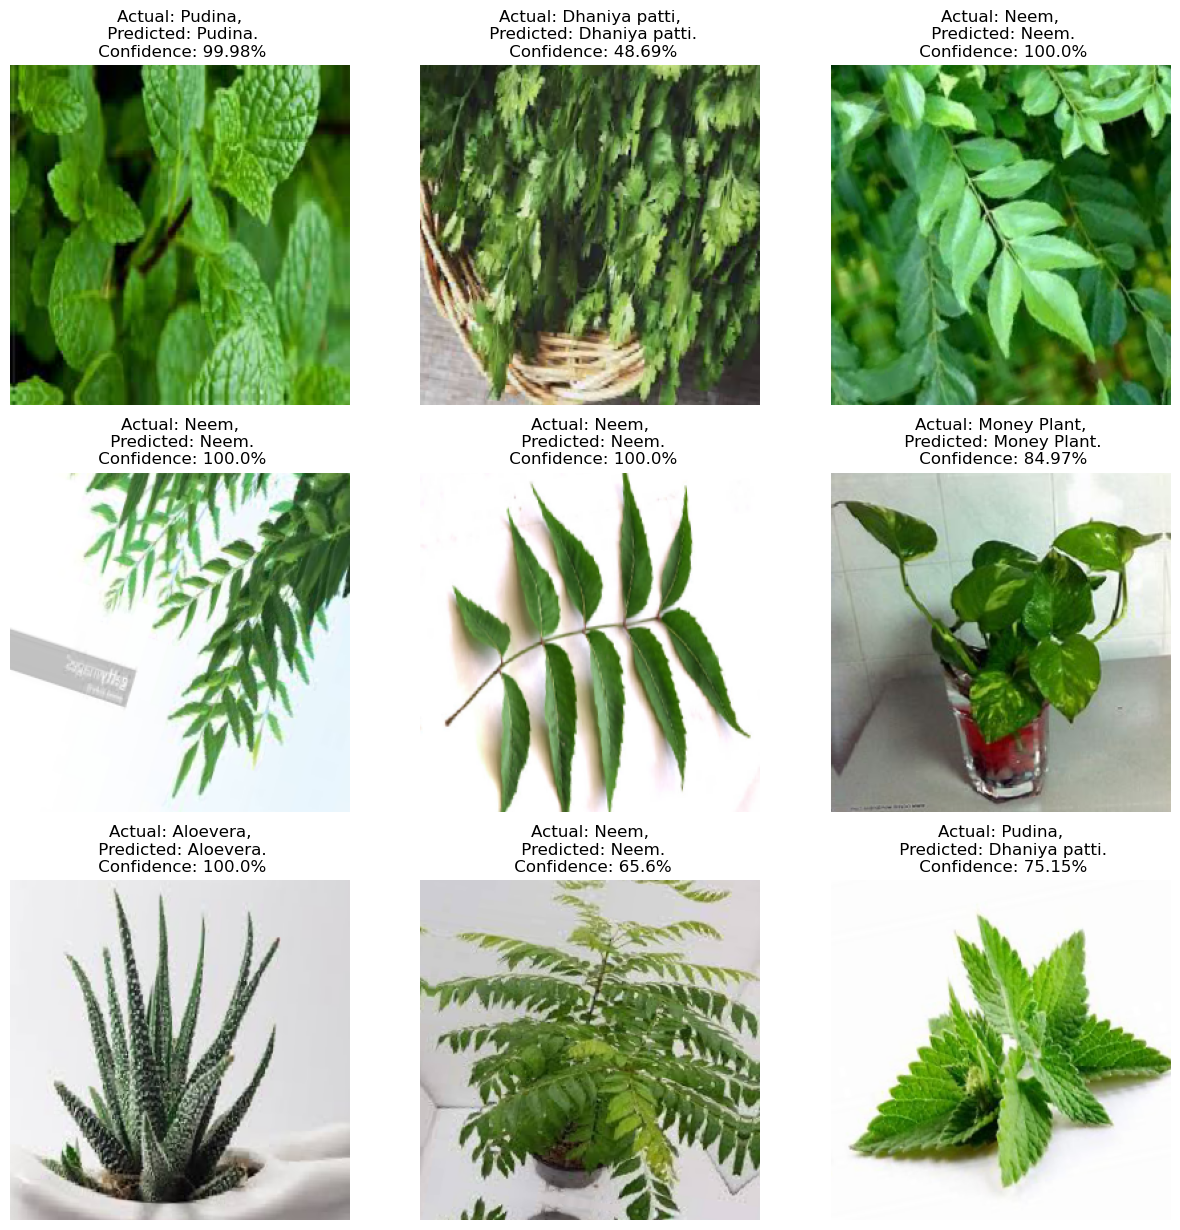

In [37]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
        
    break 

In [33]:
model.save('../plants.h5')